In [1]:
from pathlib import Path
import pandas as pd
# Mostrar floats com duas casas decimas
pd.set_option('display.float_format',  lambda x: '%.3g' % x)
pd.options.display.max_colwidth = 20
pd.options.display.max_columns = 20
pd.options.display.max_rows = 6

In [2]:
df_stocks = pd.read_csv("magic_stocks.csv", parse_dates=["cutoff_date"])
df_stocks.rank_final = df_stocks.rank_final.astype(int)
df_stocks

,cutoff_date,codneg,codisi,especi,premed,totneg,quatot,voltot,year,codemi,...,net_debt,ebit,roic,market_cap,enterprise_value,earnings_yield,rank_roic,rank_ey,ranks_sum,rank_final
0,2011-04-11,CRUZ3,BRCRUZACNOR0,ON,16.7,1814,868700,1.45e+07,2011,CRUZ,...,-1.03e+09,1.95e+09,1.83,5.11e+09,6.14e+09,0.317,3,20,23,1
1,2011-04-11,BRPR3,BRBRPRACNOR9,ON NM,17.4,154,152600,2.66e+06,2011,BRPR,...,1.6e+09,1.21e+09,0.28,2.43e+09,8.35e+08,1.45,22,4,26,2
2,2011-04-11,PTBL3,BRPTBLACNOR8,ON NM,1.91,9,26900,5.15e+04,2011,PTBL,...,1.29e+08,6.94e+07,0.366,3.04e+08,1.75e+08,0.397,13,13,26,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1582,2022-04-11,RDNI3,BRRDNIACNOR9,ON NM,8.07,35,6400,5.17e+04,2022,RDNI,...,4.71e+08,1.98e+07,0.0179,3.53e+08,-1.18e+08,-0.168,190,184,374,195
1583,2022-04-11,AMAR3,BRAMARACNOR4,ON NM,2.91,3715,4488100,1.31e+07,2022,AMAR,...,1.2e+09,4.8e+06,0.00218,7.61e+08,-4.4e+08,-0.0109,197,178,375,196
1584,2022-04-11,COGN3,BRCOGNACNOR2,ON NM,2.69,38694,59771800,1.61e+08,2022,COGN,...,5.87e+09,7.84e+07,0.00399,5.05e+09,-8.19e+08,-0.0957,196,181,377,197


In [3]:
cols = ['cutoff_date', 'codneg', 'cia_nome', 'year',  'rank_final']
df_stocks = df_stocks.loc[:, cols]
df_stocks

,cutoff_date,codneg,cia_nome,year,rank_final
0,2011-04-11,CRUZ3,SOUZA CRUZ SA,2011,1
1,2011-04-11,BRPR3,BR PROPERTIES S.A.,2011,2
2,2011-04-11,PTBL3,PBG S/A,2011,3
...,...,...,...,...,...
1582,2022-04-11,RDNI3,RNI NEGÓCIOS IMO...,2022,195
1583,2022-04-11,AMAR3,MARISA LOJAS S.A.,2022,196
1584,2022-04-11,COGN3,COGNA EDUCAÇÃO S.A.,2022,197


In [4]:
# Selecionar as 30 primeiras empresas do ranking
df_stocks.query('rank_final <= 30', inplace=True)
df_stocks.reset_index(drop=True, inplace=True)
df_stocks

,cutoff_date,codneg,cia_nome,year,rank_final
0,2011-04-11,CRUZ3,SOUZA CRUZ SA,2011,1
1,2011-04-11,BRPR3,BR PROPERTIES S.A.,2011,2
2,2011-04-11,PTBL3,PBG S/A,2011,3
...,...,...,...,...,...
357,2022-04-11,LEVE3,MAHLE-METAL LEVE...,2022,28
358,2022-04-11,CURY3,Cury Construtora...,2022,29
359,2022-04-11,CLSC4,CENTRAIS ELET DE...,2022,30


In [6]:
PROCESSED_PATH = Path("/mnt/aq_disk/data/HistoricalQuotations/processed/")
path = PROCESSED_PATH / "adjusted_data.feather"
df_b3 = pd.read_feather(path)
df_b3

,datneg,datven,prazot,codneg,codisi,especi,codbdi,tpmerc,dismes,preabe,...,preult,preofc,preofv,preexe,totneg,quatot,voltot,event1,event2,ajuste
0,1995-01-02,NaT,0,ACE 3,ACESACON,ON *INT,2,10,119,0.063,...,0.063,0.063,0.065,0,1,2e+08,1.26e+04,,,1
1,1995-01-02,NaT,0,ACE 4,ACESACPN,PN *INT,2,10,119,0.073,...,0.072,0.0715,0.073,0,5,5.3e+09,3.85e+05,,,1
2,1995-01-02,NaT,0,ACE 4,ACESACPN,PN *INT,96,20,119,0.073,...,0.072,0,0,0,4,3.05e+07,2.22e+03,,,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10899569,2022-06-03,2022-08-19,0,YDUQT188,BRYDUQACNOR3,ON NM,82,80,103,3.25,...,3.25,0,0,18.9,1,1e+03,3.25e+03,,,1
10899570,2022-06-03,NaT,0,Z1OM34,BRZ1OMBDR000,DRN,2,10,100,21,...,20.9,20.5,21.1,0,17,2.88e+04,6.05e+05,,,1
10899571,2022-06-03,NaT,0,Z1TS34,BRZ1TSBDR006,DRN,2,10,109,203,...,201,201,0,0,139,177,3.59e+04,,,1


PROCESSED_PATH = Path("/mnt/aq_disk/data/HistoricalQuotations/processed/")
path1 = PROCESSED_PATH / "dados_95-21.csv.zst"
path2 = PROCESSED_PATH / "dados_22.csv.zst"
print("Base OHLC sem ajuste")
df1 = pd.read_csv(path1, parse_dates=["datneg", "datven"])
df2 = pd.read_csv(path2, parse_dates=["datneg", "datven"])
df_b3 = pd.concat([df1, df2], ignore_index=True)
df_b3

In [7]:
df_b3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10899572 entries, 0 to 10899571
Data columns (total 23 columns):
 #   Column  Dtype         
---  ------  -----         
 0   datneg  datetime64[ns]
 1   datven  datetime64[ns]
 2   prazot  uint16        
 3   codneg  object        
 4   codisi  object        
 5   especi  object        
 6   codbdi  uint8         
 7   tpmerc  uint8         
 8   dismes  uint16        
 9   preabe  float64       
 10  premax  float64       
 11  premin  float64       
 12  premed  float64       
 13  preult  float64       
 14  preofc  float64       
 15  preofv  float64       
 16  preexe  float64       
 17  totneg  uint32        
 18  quatot  float64       
 19  voltot  float64       
 20  event1  object        
 21  event2  object        
 22  ajuste  float64       
dtypes: datetime64[ns](2), float64(11), object(5), uint16(2), uint32(1), uint8(2)
memory usage: 1.6+ GB


In [8]:
# Filtrar somente ações depois de 2010
# Retirar ações com menos de 5 negociações no dia -> essa ação, em termos
# práticos, não teve como ser negociada no dia
df_prices = df_b3.copy()
df_prices.query(
    'tpmerc == 10 and datneg >= "2011.01.01"',
    inplace=True
)
df_prices.reset_index(drop=True, inplace=True)
# Obs: A coluna 'fatcot' só tem valores direntes de 1 no caso de títulos exóticos
# Não existe esse tipo de caso na série analisada
cols = ['datneg', 'codneg', 'codisi', 'especi', 'premed', 'totneg', 'quatot', 'voltot']
df_prices = df_prices.loc[:, cols]
df_prices

,datneg,codneg,codisi,especi,premed,totneg,quatot,voltot
0,2011-01-03,ABCB4,BRABCBACNPR4,PN EJ N2,6.24,226,5.07e+05,3.17e+06
1,2011-01-03,ABCP11,BRABCPCTF000,CI ER,8.21,5,730,6e+03
2,2011-01-03,AEDU3,BRAEDUACNOR9,ON NM,13.8,1348,1.47e+06,2.02e+07
...,...,...,...,...,...,...,...,...
1593116,2022-06-03,YDUQ3,BRYDUQACNOR3,ON NM,15.8,7843,2.18e+06,3.46e+07
1593117,2022-06-03,Z1OM34,BRZ1OMBDR000,DRN,21,17,2.88e+04,6.05e+05
1593118,2022-06-03,Z1TS34,BRZ1TSBDR006,DRN,203,139,177,3.59e+04


In [9]:
df_prices = df_prices.merge(right=df_stocks, how='inner')
df_prices

,datneg,codneg,codisi,especi,premed,totneg,quatot,voltot,cutoff_date,cia_nome,year,rank_final
0,2011-01-03,ALPA4,BRALPAACNPR7,PN N1,5.02,312,2.61e+05,1.31e+06,2017-04-10,ALPARGATAS S.A.,2017,25
1,2011-01-04,ALPA4,BRALPAACNPR7,PN N1,4.98,97,2.07e+05,1.03e+06,2017-04-10,ALPARGATAS S.A.,2017,25
2,2011-01-05,ALPA4,BRALPAACNPR7,PN N1,4.97,226,1.47e+06,7.29e+06,2017-04-10,ALPARGATAS S.A.,2017,25
...,...,...,...,...,...,...,...,...,...,...,...,...
857230,2022-06-01,SYNE3,BRSYNEACNOR2,ON NM,5.05,3189,5.83e+05,2.95e+06,2022-04-11,SYN PROP & TECH ...,2022,3
857231,2022-06-02,SYNE3,BRSYNEACNOR2,ON NM,5.13,2604,8.7e+05,4.46e+06,2022-04-11,SYN PROP & TECH ...,2022,3
857232,2022-06-03,SYNE3,BRSYNEACNOR2,ON NM,5.38,3053,1.09e+06,5.88e+06,2022-04-11,SYN PROP & TECH ...,2022,3


In [10]:
cutoff_list = sorted(list(df_prices.cutoff_date.drop_duplicates()))
cutoff_list.append(cutoff_list[-1] + pd.DateOffset(years=1))
cutoff_dict = dict(enumerate(cutoff_list))
cutoff_dict

{0: Timestamp('2011-04-11 00:00:00'),
 1: Timestamp('2012-04-09 00:00:00'),
 2: Timestamp('2013-04-10 00:00:00'),
 3: Timestamp('2014-04-10 00:00:00'),
 4: Timestamp('2015-04-10 00:00:00'),
 5: Timestamp('2016-04-11 00:00:00'),
 6: Timestamp('2017-04-10 00:00:00'),
 7: Timestamp('2018-04-10 00:00:00'),
 8: Timestamp('2019-04-10 00:00:00'),
 9: Timestamp('2020-04-09 00:00:00'),
 10: Timestamp('2021-04-12 00:00:00'),
 11: Timestamp('2022-04-11 00:00:00'),
 12: Timestamp('2023-04-11 00:00:00')}

In [11]:
df_prices['cutoff_order'] = df_prices['cutoff_date'].rank(method='dense').astype(int)
df_prices

,datneg,codneg,codisi,especi,premed,totneg,quatot,voltot,cutoff_date,cia_nome,year,rank_final,cutoff_order
0,2011-01-03,ALPA4,BRALPAACNPR7,PN N1,5.02,312,2.61e+05,1.31e+06,2017-04-10,ALPARGATAS S.A.,2017,25,7
1,2011-01-04,ALPA4,BRALPAACNPR7,PN N1,4.98,97,2.07e+05,1.03e+06,2017-04-10,ALPARGATAS S.A.,2017,25,7
2,2011-01-05,ALPA4,BRALPAACNPR7,PN N1,4.97,226,1.47e+06,7.29e+06,2017-04-10,ALPARGATAS S.A.,2017,25,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
857230,2022-06-01,SYNE3,BRSYNEACNOR2,ON NM,5.05,3189,5.83e+05,2.95e+06,2022-04-11,SYN PROP & TECH ...,2022,3,12
857231,2022-06-02,SYNE3,BRSYNEACNOR2,ON NM,5.13,2604,8.7e+05,4.46e+06,2022-04-11,SYN PROP & TECH ...,2022,3,12
857232,2022-06-03,SYNE3,BRSYNEACNOR2,ON NM,5.38,3053,1.09e+06,5.88e+06,2022-04-11,SYN PROP & TECH ...,2022,3,12


In [12]:
df_prices['next_cutoff'] = df_prices['cutoff_order'].map(cutoff_dict)
df_prices.drop(columns='cutoff_order', inplace=True)
df_prices

,datneg,codneg,codisi,especi,premed,totneg,quatot,voltot,cutoff_date,cia_nome,year,rank_final,next_cutoff
0,2011-01-03,ALPA4,BRALPAACNPR7,PN N1,5.02,312,2.61e+05,1.31e+06,2017-04-10,ALPARGATAS S.A.,2017,25,2018-04-10
1,2011-01-04,ALPA4,BRALPAACNPR7,PN N1,4.98,97,2.07e+05,1.03e+06,2017-04-10,ALPARGATAS S.A.,2017,25,2018-04-10
2,2011-01-05,ALPA4,BRALPAACNPR7,PN N1,4.97,226,1.47e+06,7.29e+06,2017-04-10,ALPARGATAS S.A.,2017,25,2018-04-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
857230,2022-06-01,SYNE3,BRSYNEACNOR2,ON NM,5.05,3189,5.83e+05,2.95e+06,2022-04-11,SYN PROP & TECH ...,2022,3,2023-04-11
857231,2022-06-02,SYNE3,BRSYNEACNOR2,ON NM,5.13,2604,8.7e+05,4.46e+06,2022-04-11,SYN PROP & TECH ...,2022,3,2023-04-11
857232,2022-06-03,SYNE3,BRSYNEACNOR2,ON NM,5.38,3053,1.09e+06,5.88e+06,2022-04-11,SYN PROP & TECH ...,2022,3,2023-04-11


In [13]:
df_prices.query('cutoff_date <= datneg <= next_cutoff', inplace=True)
df_prices.sort_values(['codneg', 'datneg'], inplace=True, ignore_index=True)
df_prices

,datneg,codneg,codisi,especi,premed,totneg,quatot,voltot,cutoff_date,cia_nome,year,rank_final,next_cutoff
0,2016-04-11,ABEV3,BRABEVACNOR1,ON,15.2,25280,1.75e+07,2.66e+08,2016-04-11,AMBEV S.A.,2016,19,2017-04-10
1,2016-04-12,ABEV3,BRABEVACNOR1,ON,15.2,27607,1.31e+07,2e+08,2016-04-11,AMBEV S.A.,2016,19,2017-04-10
2,2016-04-13,ABEV3,BRABEVACNOR1,ON,15.4,48950,2.4e+07,3.7e+08,2016-04-11,AMBEV S.A.,2016,19,2017-04-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81422,2022-04-07,WHRL4,BRWHRLACNPR2,PN,6.14,16,1.04e+04,6.39e+04,2021-04-12,WHIRLPOOL S.A.,2021,28,2022-04-11
81423,2022-04-08,WHRL4,BRWHRLACNPR2,PN,6.17,37,1.75e+04,1.08e+05,2021-04-12,WHIRLPOOL S.A.,2021,28,2022-04-11
81424,2022-04-11,WHRL4,BRWHRLACNPR2,PN,6.1,86,5.57e+04,3.4e+05,2021-04-12,WHIRLPOOL S.A.,2021,28,2022-04-11


In [14]:
df_prices['first_value'] = df_prices.groupby(by=['codneg', 'cutoff_date'])['premed'].transform('first')
df_prices

,datneg,codneg,codisi,especi,premed,totneg,quatot,voltot,cutoff_date,cia_nome,year,rank_final,next_cutoff,first_value
0,2016-04-11,ABEV3,BRABEVACNOR1,ON,15.2,25280,1.75e+07,2.66e+08,2016-04-11,AMBEV S.A.,2016,19,2017-04-10,15.2
1,2016-04-12,ABEV3,BRABEVACNOR1,ON,15.2,27607,1.31e+07,2e+08,2016-04-11,AMBEV S.A.,2016,19,2017-04-10,15.2
2,2016-04-13,ABEV3,BRABEVACNOR1,ON,15.4,48950,2.4e+07,3.7e+08,2016-04-11,AMBEV S.A.,2016,19,2017-04-10,15.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81422,2022-04-07,WHRL4,BRWHRLACNPR2,PN,6.14,16,1.04e+04,6.39e+04,2021-04-12,WHIRLPOOL S.A.,2021,28,2022-04-11,7.35
81423,2022-04-08,WHRL4,BRWHRLACNPR2,PN,6.17,37,1.75e+04,1.08e+05,2021-04-12,WHIRLPOOL S.A.,2021,28,2022-04-11,7.35
81424,2022-04-11,WHRL4,BRWHRLACNPR2,PN,6.1,86,5.57e+04,3.4e+05,2021-04-12,WHIRLPOOL S.A.,2021,28,2022-04-11,7.35


In [15]:
df_prices['price_n'] = 100 * df_prices.premed / df_prices.first_value 
df_prices

,datneg,codneg,codisi,especi,premed,totneg,quatot,voltot,cutoff_date,cia_nome,year,rank_final,next_cutoff,first_value,price_n
0,2016-04-11,ABEV3,BRABEVACNOR1,ON,15.2,25280,1.75e+07,2.66e+08,2016-04-11,AMBEV S.A.,2016,19,2017-04-10,15.2,100
1,2016-04-12,ABEV3,BRABEVACNOR1,ON,15.2,27607,1.31e+07,2e+08,2016-04-11,AMBEV S.A.,2016,19,2017-04-10,15.2,100
2,2016-04-13,ABEV3,BRABEVACNOR1,ON,15.4,48950,2.4e+07,3.7e+08,2016-04-11,AMBEV S.A.,2016,19,2017-04-10,15.2,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81422,2022-04-07,WHRL4,BRWHRLACNPR2,PN,6.14,16,1.04e+04,6.39e+04,2021-04-12,WHIRLPOOL S.A.,2021,28,2022-04-11,7.35,83.5
81423,2022-04-08,WHRL4,BRWHRLACNPR2,PN,6.17,37,1.75e+04,1.08e+05,2021-04-12,WHIRLPOOL S.A.,2021,28,2022-04-11,7.35,83.9
81424,2022-04-11,WHRL4,BRWHRLACNPR2,PN,6.1,86,5.57e+04,3.4e+05,2021-04-12,WHIRLPOOL S.A.,2021,28,2022-04-11,7.35,83


In [16]:
df_prices['pct_change'] = df_prices.groupby(by=['codneg', 'next_cutoff'])['price_n'].pct_change()
df_prices

,datneg,codneg,codisi,especi,premed,totneg,quatot,voltot,cutoff_date,cia_nome,year,rank_final,next_cutoff,first_value,price_n,pct_change
0,2016-04-11,ABEV3,BRABEVACNOR1,ON,15.2,25280,1.75e+07,2.66e+08,2016-04-11,AMBEV S.A.,2016,19,2017-04-10,15.2,100,NaN
1,2016-04-12,ABEV3,BRABEVACNOR1,ON,15.2,27607,1.31e+07,2e+08,2016-04-11,AMBEV S.A.,2016,19,2017-04-10,15.2,100,0.00219
2,2016-04-13,ABEV3,BRABEVACNOR1,ON,15.4,48950,2.4e+07,3.7e+08,2016-04-11,AMBEV S.A.,2016,19,2017-04-10,15.2,101,0.012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81422,2022-04-07,WHRL4,BRWHRLACNPR2,PN,6.14,16,1.04e+04,6.39e+04,2021-04-12,WHIRLPOOL S.A.,2021,28,2022-04-11,7.35,83.5,0.00491
81423,2022-04-08,WHRL4,BRWHRLACNPR2,PN,6.17,37,1.75e+04,1.08e+05,2021-04-12,WHIRLPOOL S.A.,2021,28,2022-04-11,7.35,83.9,0.00489
81424,2022-04-11,WHRL4,BRWHRLACNPR2,PN,6.1,86,5.57e+04,3.4e+05,2021-04-12,WHIRLPOOL S.A.,2021,28,2022-04-11,7.35,83,-0.0113


In [17]:
df_prices.sort_values('pct_change', ascending=True).head(6)

,datneg,codneg,codisi,especi,premed,totneg,quatot,voltot,cutoff_date,cia_nome,year,rank_final,next_cutoff,first_value,price_n,pct_change
20387,2021-03-12,CPLE6,BRCPLEACNPB9,PNB EB N1,4.81,25852,1.68e+07,8.09e+07,2020-04-09,CIA PARANAENSE D...,2020,26,2021-04-12,41.1,11.7,-0.899
17480,2011-06-29,CPFE3,BRCPFEACNOR0,ON EBG NM,13.9,1237,8.27e+05,1.15e+07,2011-04-11,CPFL ENERGIA S.A.,2011,26,2012-04-09,28,49.7,-0.495
68987,2020-03-18,SMLS3,BRSMLSACNOR1,ON NM,8.93,14016,5.32e+06,4.75e+07,2019-04-10,SMILES FIDELIDAD...,2019,10,2020-04-09,34.5,25.9,-0.331
3445,2020-03-18,AMAR3,BRAMARACNOR4,ON NM,3.54,17634,7.82e+06,2.78e+07,2019-04-10,MARISA LOJAS S.A.,2019,9,2020-04-09,6.25,56.7,-0.331
68985,2020-03-16,SMLS3,BRSMLSACNOR1,ON NM,13.1,16910,5.62e+06,7.34e+07,2019-04-10,SMILES FIDELIDAD...,2019,10,2020-04-09,34.5,37.9,-0.317
25844,2020-03-12,CVCB3,BRCVCBACNOR1,ON NM,12.2,14961,7e+06,8.57e+07,2019-04-10,CVC BRASIL OPERA...,2019,28,2020-04-09,46.3,26.5,-0.315


In [18]:
df_prices.loc[17456:17459]

,datneg,codneg,codisi,especi,premed,totneg,quatot,voltot,cutoff_date,cia_nome,year,rank_final,next_cutoff,first_value,price_n,pct_change
17456,2011-05-25,CPFE3,BRCPFEACNOR0,ON NM,29.2,1128,3.98e+05,1.16e+07,2011-04-11,CPFL ENERGIA S.A.,2011,26,2012-04-09,28,104,-0.000857
17457,2011-05-26,CPFE3,BRCPFEACNOR0,ON NM,29.1,1308,4.35e+05,1.27e+07,2011-04-11,CPFL ENERGIA S.A.,2011,26,2012-04-09,28,104,-0.00493
17458,2011-05-27,CPFE3,BRCPFEACNOR0,ON NM,28.8,1363,4.68e+05,1.35e+07,2011-04-11,CPFL ENERGIA S.A.,2011,26,2012-04-09,28,103,-0.0101
17459,2011-05-30,CPFE3,BRCPFEACNOR0,ON NM,28.8,675,2.37e+05,6.83e+06,2011-04-11,CPFL ENERGIA S.A.,2011,26,2012-04-09,28,103,0.000653


In [19]:
df_return = df_prices.groupby(by=['datneg', 'next_cutoff'])['price_n'].mean().reset_index()
df_return

,datneg,next_cutoff,price_n
0,2011-04-11,2012-04-09,100
1,2011-04-12,2012-04-09,99
2,2011-04-13,2012-04-09,98.9
...,...,...,...
2768,2022-06-01,2023-04-11,101
2769,2022-06-02,2023-04-11,102
2770,2022-06-03,2023-04-11,101


In [20]:
df_return['last_group_price'] = df_return.groupby(by=['next_cutoff'])['price_n'].transform('last')
df_return

,datneg,next_cutoff,price_n,last_group_price
0,2011-04-11,2012-04-09,100,116
1,2011-04-12,2012-04-09,99,116
2,2011-04-13,2012-04-09,98.9,116
...,...,...,...,...
2768,2022-06-01,2023-04-11,101,101
2769,2022-06-02,2023-04-11,102,101
2770,2022-06-03,2023-04-11,101,101


In [21]:
factor = 1
df_return['price_acum'] = 0
for i in df_return.index:
    df_return.loc[i, 'price_acum'] = df_return.loc[i, 'price_n'] * factor
    if df_return.loc[i].datneg ==  df_return.loc[i].next_cutoff:
        factor = factor * df_return.loc[i, 'price_n'] / 100
        print(i, factor)

248 1.1636959223899124
495 1.1346211834271578
746 0.9814641641675931
994 0.8617206408595345
1240 0.6701550352224172
1491 0.8278987723194488
1737 1.2674435820795937
1984 1.4457268367288632
2234 1.2028386200784065
2482 1.852754334087919
2732 1.984870293544867


In [22]:
df_return

,datneg,next_cutoff,price_n,last_group_price,price_acum
0,2011-04-11,2012-04-09,100,116,100
1,2011-04-12,2012-04-09,99,116,99
2,2011-04-13,2012-04-09,98.9,116,98.9
...,...,...,...,...,...
2768,2022-06-01,2023-04-11,101,101,200
2769,2022-06-02,2023-04-11,102,101,202
2770,2022-06-03,2023-04-11,101,101,201


In [23]:
df_return.loc[247:250]

,datneg,next_cutoff,price_n,last_group_price,price_acum
247,2012-04-05,2012-04-09,116,116,116
248,2012-04-09,2012-04-09,116,116,116
249,2012-04-09,2013-04-10,100,97.5,116
250,2012-04-10,2013-04-10,99.4,97.5,116


In [24]:
df_return.loc[494:498]

,datneg,next_cutoff,price_n,last_group_price,price_acum
494,2013-04-09,2013-04-10,99.3,97.5,116
495,2013-04-10,2013-04-10,97.5,97.5,113
496,2013-04-10,2014-04-10,100,86.5,113
497,2013-04-11,2014-04-10,99.1,86.5,112
498,2013-04-12,2014-04-10,98.7,86.5,112


In [25]:
df_return.drop_duplicates('datneg', inplace=True)
df_return

,datneg,next_cutoff,price_n,last_group_price,price_acum
0,2011-04-11,2012-04-09,100,116,100
1,2011-04-12,2012-04-09,99,116,99
2,2011-04-13,2012-04-09,98.9,116,98.9
...,...,...,...,...,...
2768,2022-06-01,2023-04-11,101,101,200
2769,2022-06-02,2023-04-11,102,101,202
2770,2022-06-03,2023-04-11,101,101,201


In [26]:
cols = ['datneg', 'premed']
df_bova = df_b3.query('codneg == "BOVA11" and datneg >= "2011-04-11"')[cols]
df_bova.reset_index(drop=True, inplace=True)
df_bova

,datneg,premed
0,2011-04-11,67.8
1,2011-04-12,66.4
2,2011-04-13,65.9
...,...,...
2757,2022-06-01,108
2758,2022-06-02,108
2759,2022-06-03,107


In [27]:
df_bova.premed = 100 * df_bova.premed / df_bova.loc[0, 'premed']
df_bova

,datneg,premed
0,2011-04-11,100
1,2011-04-12,98
2,2011-04-13,97.2
...,...,...
2757,2022-06-01,159
2758,2022-06-02,160
2759,2022-06-03,158


In [28]:
df_return = df_return.merge(right=df_bova, how='inner')
df_return.rename(
    columns={"price_acum": "MagicFormula", "premed": "BOVA11"}, inplace=True)
df_return.set_index('datneg', inplace=True)
df_return

,next_cutoff,price_n,last_group_price,MagicFormula,BOVA11
datneg,,,,,
2011-04-11,2012-04-09,100,116,100,100
2011-04-12,2012-04-09,99,116,99,98
2011-04-13,2012-04-09,98.9,116,98.9,97.2
...,...,...,...,...,...
2022-06-01,2023-04-11,101,101,200,159
2022-06-02,2023-04-11,102,101,202,160
2022-06-03,2023-04-11,101,101,201,158


<AxesSubplot:xlabel='datneg'>

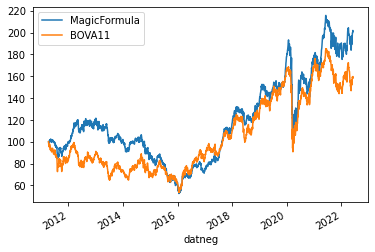

In [29]:
df_return[['MagicFormula', 'BOVA11']].plot()

<AxesSubplot:xlabel='datneg'>

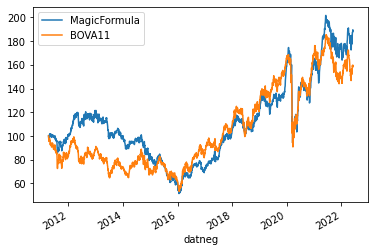

In [73]:
df_return[['MagicFormula', 'BOVA11']].plot()

<AxesSubplot:xlabel='datneg'>

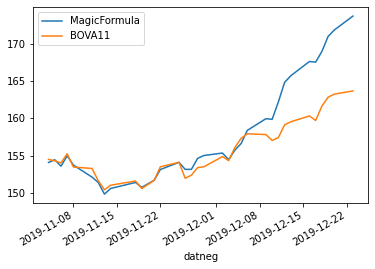

In [30]:
df_return.query('"2019-11-01" < datneg < "2019-12-24"')[['MagicFormula', 'BOVA11']].plot()

In [75]:
df_return.query('"2019-11-01" < datneg < "2019-12-24"')

,next_cutoff,price_n,last_group_price,MagicFormula,BOVA11
datneg,,,,,
2019-11-04,2020-04-09,106,85.4,135,154
2019-11-05,2020-04-09,106,85.4,136,154
2019-11-06,2020-04-09,106,85.4,135,154
...,...,...,...,...,...
2019-12-19,2020-04-09,119,85.4,152,163
2019-12-20,2020-04-09,120,85.4,153,163
2019-12-23,2020-04-09,122,85.4,155,164
